---
title: Time Series Models
subtitle: Foundations of Statistical Analysis in Python
abstract: This Jupyter Notebook provides a comprehensive introduction to time series modeling, focusing on techniques for analyzing, visualizing, and forecasting temporal data. It begins with essential concepts such as time series components (trend, seasonality, and noise) and exploratory data analysis. The notebook then explores statistical modeling approaches including Autoregressive (AR), Moving Average (MA), ARIMA, and seasonal ARIMA (SARIMA) models.
author:
  - name: Karol Flisikowski
    affiliations: 
      - Gdansk University of Technology
      - Chongqing Technology and Business University
    orcid: 0000-0002-4160-1297
    email: karol@ctbu.edu.cn
date: 2025-06-08
---

## Autoregressive models

> **Autoregressive (AR) models:**
>
> $$
>   y_{t}  =  c  +  \phi_{1}y_{t - 1}  +  \phi_{2}y_{t - 2}  +  \cdots  +  \phi_{p}y_{t - p}  + \varepsilon_{t},
> $$
> where $\varepsilon_t$ is white noise. This is a multiple regression with **lagged values** of $y_t$ as predictors.

---

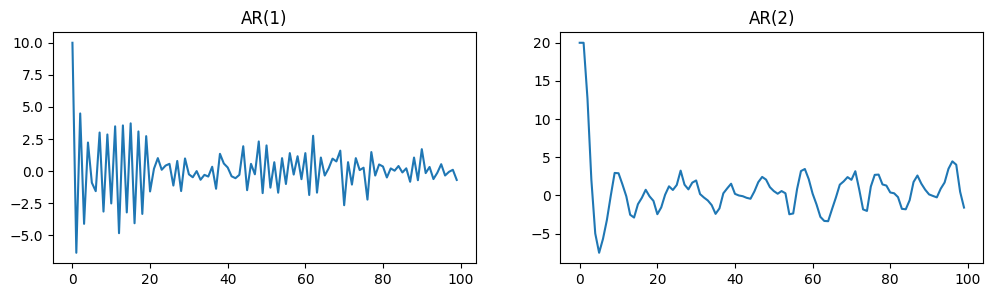

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
n = 100

# AR(1)
ar1 = [10]
for t in range(1, n):
    ar1.append(-0.8 * ar1[-1] + np.random.normal())
ar1 = np.array(ar1)

# AR(2)
ar2 = [20, 20]
for t in range(2, n):
    ar2.append(1.3 * ar2[-1] - 0.7 * ar2[-2] + np.random.normal())
ar2 = np.array(ar2)

fig, axs = plt.subplots(1, 2, figsize=(12, 3))
axs[0].plot(ar1)
axs[0].set_title("AR(1)")
axs[1].plot(ar2)
axs[1].set_title("AR(2)")
plt.show()

## AR(1) model

$$
y_{t} = 2 - 0.8\, y_{t-1} + \varepsilon_{t}
$$

$$
\varepsilon_t \sim N(0,1), \quad T=100
$$


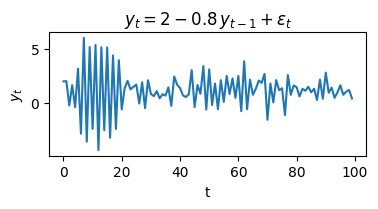

In [2]:
np.random.seed(1)
n = 100
y = [2]
for t in range(1, n):
    y.append(2 - 0.8 * y[-1] + np.random.normal())
y = np.array(y)

plt.figure(figsize=(4, 2.2))
plt.plot(y, color='tab:blue')
plt.title(r"$y_t = 2 - 0.8\, y_{t-1} + \varepsilon_t$")
plt.xlabel("t")
plt.ylabel("$y_t$")
plt.tight_layout()
plt.show()

## AR(1) model

$$
y_{t} = c + \phi_1 y_{t - 1} + \varepsilon_{t}
$$

- When $\phi_1 = 0$, $y_t$ is **equivalent to white noise (WN)**.
- When $\phi_1 = 1$ and $c = 0$, $y_t$ is **equivalent to a random walk (RW)**.
- When $\phi_1 = 1$ and $c \ne 0$, $y_t$ is **equivalent to a random walk with drift**.
- When $\phi_1 < 0$, $y_t$ tends to **oscillate between positive and negative values**.

## AR(2) model

$$
y_t = 8 + 1.3\, y_{t-1} - 0.7\, y_{t-2} + \varepsilon_t
$$

$$
\varepsilon_t \sim N(0,1), \qquad T=100
$$

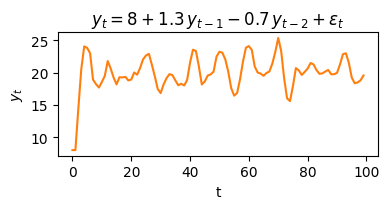

In [3]:
np.random.seed(1)
n = 100
y = [8, 8]
for t in range(2, n):
    y.append(8 + 1.3 * y[-1] - 0.7 * y[-2] + np.random.normal())
y = np.array(y)

plt.figure(figsize=(4, 2.2))
plt.plot(y, color='tab:orange')
plt.title(r"$y_t = 8 + 1.3\, y_{t-1} - 0.7\, y_{t-2} + \varepsilon_t$")
plt.xlabel("t")
plt.ylabel("$y_t$")
plt.tight_layout()
plt.show()

## Stationarity conditions

We normally restrict autoregressive models to stationary data, and then
some constraints on the values of the parameters are required.

**General condition for stationarity:**  
The complex roots of $1 - \phi_1 z - \phi_2 z^2 - \dots - \phi_p z^p$ must lie outside the unit circle in the complex plane.

- For $p=1$: $-1 < \phi_1 < 1$.
- For $p=2$: $-1 < \phi_2 < 1$  $\phi_2 + \phi_1 < 1$  $\phi_2 - \phi_1 < 1$.
- More complicated conditions hold for $p \ge 3$.
- Estimation software will check these conditions automatically.

## Moving Average (MA) models

> **Moving Average (MA) models:**
>
> $$
>   y_{t} = c + \varepsilon_t + \theta_{1}\varepsilon_{t - 1} + \theta_{2}\varepsilon_{t - 2} + \cdots + \theta_{q}\varepsilon_{t - q},
> $$
> where $\varepsilon_t$ is white noise.  
> This is a multiple regression with **past errors** as predictors.  
> *Don't confuse this with moving average smoothing!*

---

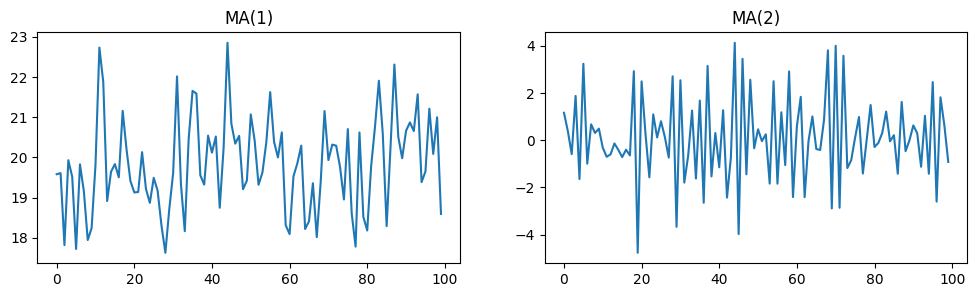

In [4]:
np.random.seed(2)
n = 100

# MA(1)
e = np.random.normal(size=n)
ma1 = 20 + e + 0.8 * np.roll(e, 1)
ma1[0] = 20 + e[0]  # first value, since e[-1] is not defined

# MA(2)
e2 = np.random.normal(size=n)
ma2 = e2 + (-1) * np.roll(e2, 1) + 0.8 * np.roll(e2, 2)
ma2[0:2] = e2[0:2]  # first two values, since e2[-1], e2[-2] not defined

fig, axs = plt.subplots(1, 2, figsize=(12, 3))
axs[0].plot(ma1)
axs[0].set_title("MA(1)")
axs[1].plot(ma2)
axs[1].set_title("MA(2)")
plt.show()

## MA(1) model

$$
y_t = 20 + \varepsilon_t + 0.8\, \varepsilon_{t-1}
$$

$$
\varepsilon_t \sim N(0,1), \quad T=100
$$

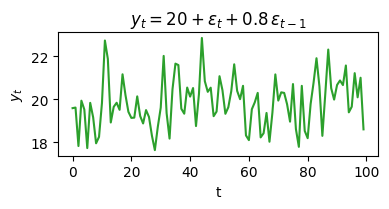

In [5]:
np.random.seed(2)
n = 100
e = np.random.normal(size=n)
ma1 = 20 + e + 0.8 * np.roll(e, 1)
ma1[0] = 20 + e[0]  # first value, since e[-1] is not defined

plt.figure(figsize=(4, 2.2))
plt.plot(ma1, color='tab:green')
plt.title(r"$y_t = 20 + \varepsilon_t + 0.8\, \varepsilon_{t-1}$")
plt.xlabel("t")
plt.ylabel("$y_t$")
plt.tight_layout()
plt.show()

## MA(2) model

$$
y_t = \varepsilon_t - \varepsilon_{t-1} + 0.8\, \varepsilon_{t-2}
$$

$$
\varepsilon_t \sim N(0,1), \quad T=100
$$

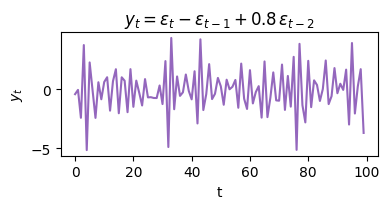

In [6]:
np.random.seed(2)
n = 100
e = np.random.normal(size=n)
ma2 = e + (-1) * np.roll(e, 1) + 0.8 * np.roll(e, 2)
ma2[0:2] = e[0:2]  # first two values, since e[-1], e[-2] not defined

plt.figure(figsize=(4, 2.2))
plt.plot(ma2, color='tab:purple')
plt.title(r"$y_t = \varepsilon_t - \varepsilon_{t-1} + 0.8\, \varepsilon_{t-2}$")
plt.xlabel("t")
plt.ylabel("$y_t$")
plt.tight_layout()
plt.show()

## MA($\infty$) models

It is possible to write any stationary AR($p$) process as an MA($\infty$) process.

**Example: AR(1)**

$$
\begin{align*}
y_t &= \phi_1 y_{t-1} + \varepsilon_t \\
    &= \phi_1 (\phi_1 y_{t-2} + \varepsilon_{t-1}) + \varepsilon_t \\
    &= \phi_1^2 y_{t-2} + \phi_1 \varepsilon_{t-1} + \varepsilon_t \\
    &= \phi_1^3 y_{t-3} + \phi_1^2 \varepsilon_{t-2} + \phi_1 \varepsilon_{t-1} + \varepsilon_t \\
    &\dots
\end{align*}
$$

Provided $-1 < \phi_1 < 1$:
$$
y_t = \varepsilon_t + \phi_1 \varepsilon_{t-1} + \phi_1^2 \varepsilon_{t-2} + \phi_1^3 \varepsilon_{t-3} + \cdots
$$

## Invertibility

-   Any MA($q$) process can be written as an AR($\infty$) process if we
    impose some constraints on the MA parameters.
-   Then the MA model is called "invertible".
-   Invertible models have some mathematical properties that make them
    easier to use in practice.
-   Invertibility of an ARIMA model is equivalent to forecastability of
    an ETS model.

## Invertibility

**General condition for invertibility:**  
The complex roots of $1 + \theta_1 z + \theta_2 z^2 + \dots + \theta_q z^q$ must lie outside the unit circle in the complex plane.

- For $q=1$: $-1 < \theta_1 < 1$.
- For $q=2$: $-1 < \theta_2 < 1$  $\theta_2 + \theta_1 > -1$  $\theta_1 - \theta_2 < 1$.
- More complicated conditions hold for $q \ge 3$.
- Estimation software will check these conditions automatically.

## ARIMA models

**Autoregressive Moving Average models:**

$$
\begin{align*}
y_{t}  &=  c  +  \phi_{1}y_{t - 1}  +  \cdots  +  \phi_{p}y_{t - p} \\
       &\quad + \theta_{1}\varepsilon_{t - 1} +  \cdots  + \theta_{q}\varepsilon_{t - q} +  \varepsilon_{t}.
\end{align*}
$$

- Predictors include both **lagged values of** $y_t$ and lagged errors.
- Conditions on coefficients ensure stationarity.
- Conditions on coefficients ensure invertibility.

-   Combine ARMA model with **differencing**.
-   $(1-B)^d y_t$ follows an ARMA model.

## ARIMA models

**Autoregressive Integrated Moving Average models**

**ARIMA($p, d, q$) model:**

| Component | Description                                 |
|-----------|---------------------------------------------|
| AR        | $p =$  order of the autoregressive part     |
| I         | $d =$  degree of differencing               |
| MA        | $q =$  order of the moving average part     |

- White noise model: ARIMA(0,0,0)
- Random walk: ARIMA(0,1,0) with no constant
- Random walk with drift: ARIMA(0,1,0) with constant
- AR($p$): ARIMA($p$,0,0)
- MA($q$): ARIMA(0,0,$q$)

## European quarterly retail trade

In [82]:
import pandas as pd

euretail = pd.read_csv('data/euretail.csv')

# Convert 'time' to float
euretail['time'] = euretail['time'].astype(float)

# Extract year and quarter from 'time'
years = euretail['time'].astype(int)
quarters = ((euretail['time'] % 1) * 4 + 1).astype(int)

# Use PeriodIndex.from_fields to avoid the warning
euretail['quarter'] = pd.PeriodIndex.from_fields(year=years, quarter=quarters, freq='Q')

# Set the quarterly index
euretail.set_index('quarter', inplace=True)
euretail = euretail.drop(columns=['rownames', 'time'])

print(euretail.head())
print(euretail.index)
print(type(euretail.index))

         value
quarter       
1996Q1   89.13
1996Q2   89.52
1996Q3   89.88
1996Q4   90.12
1997Q1   89.19
PeriodIndex(['1996Q1', '1996Q2', '1996Q3', '1996Q4', '1997Q1', '1997Q2',
             '1997Q3', '1997Q4', '1998Q1', '1998Q2', '1998Q3', '1998Q4',
             '1999Q1', '1999Q2', '1999Q3', '1999Q4', '2000Q1', '2000Q2',
             '2000Q3', '2000Q4', '2001Q1', '2001Q2', '2001Q3', '2001Q4',
             '2002Q1', '2002Q2', '2002Q3', '2002Q4', '2003Q1', '2003Q2',
             '2003Q3', '2003Q4', '2004Q1', '2004Q2', '2004Q3', '2004Q4',
             '2005Q1', '2005Q2', '2005Q3', '2005Q4', '2006Q1', '2006Q2',
             '2006Q3', '2006Q4', '2007Q1', '2007Q2', '2007Q3', '2007Q4',
             '2008Q1', '2008Q2', '2008Q3', '2008Q4', '2009Q1', '2009Q2',
             '2009Q3', '2009Q4', '2010Q1', '2010Q2', '2010Q3', '2010Q4',
             '2011Q1', '2011Q2', '2011Q3', '2011Q4'],
            dtype='period[Q-DEC]', name='quarter')
<class 'pandas.core.indexes.period.PeriodIndex'>


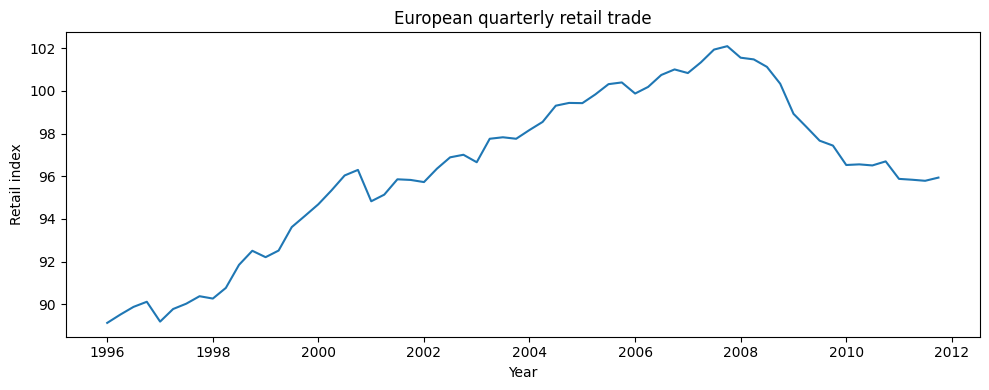

In [86]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(euretail.index.to_timestamp(), euretail['value'])  # Convert PeriodIndex to Timestamp for plotting
plt.xlabel("Year")
plt.ylabel("Retail index")
plt.title("European quarterly retail trade")
plt.tight_layout()
plt.show()

## Your turn! 

Interpret the following plots:

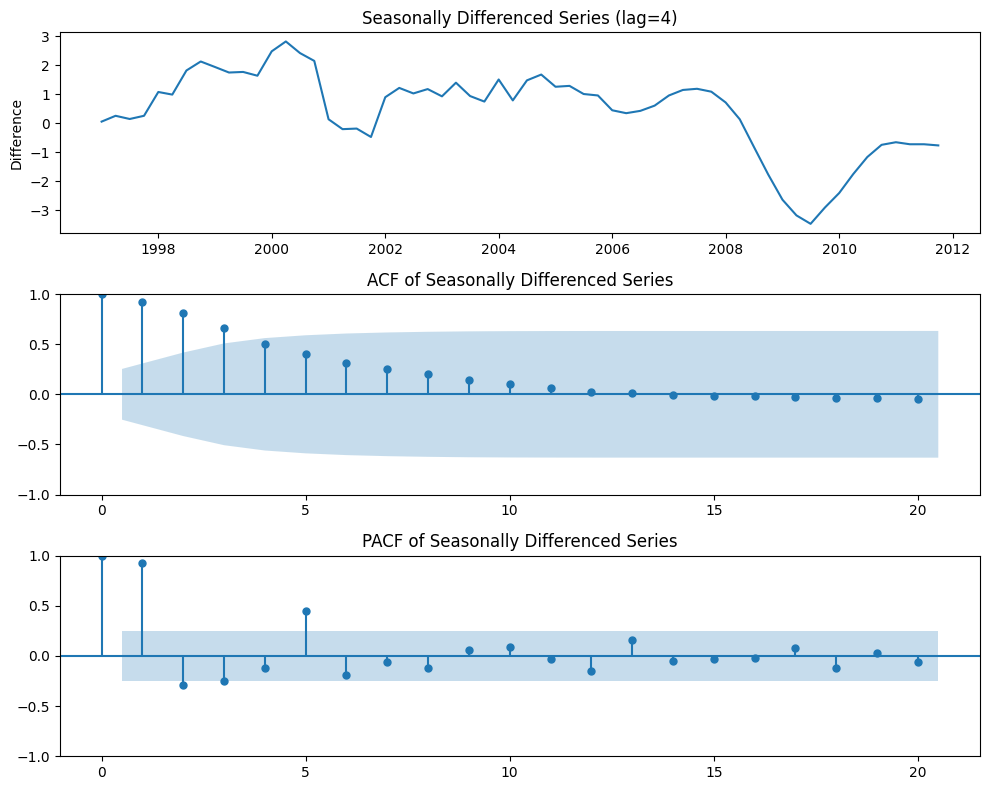

In [88]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Use euretail directly (no need for euretail_plot)
# Perform seasonal differencing with lag=4 (for quarterly seasonality)
euretail_diff = euretail['value'].diff(4).dropna()

# Ensure the index matches the differenced data for correct x-axis
euretail_diff.index = euretail.index[4:]

# Determine max lags to avoid overshooting with small datasets
max_lags = min(20, len(euretail_diff) // 2 - 1)

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(10, 8))

# 1. Plot the seasonally differenced series
axes[0].plot(euretail_diff.index.to_timestamp(), euretail_diff)
axes[0].set_title("Seasonally Differenced Series (lag=4)")
axes[0].set_ylabel("Difference")

# 2. Plot ACF
plot_acf(euretail_diff, ax=axes[1], lags=max_lags)
axes[1].set_title("ACF of Seasonally Differenced Series")

# 3. Plot PACF
plot_pacf(euretail_diff, ax=axes[2], lags=max_lags, method='ywm')
axes[2].set_title("PACF of Seasonally Differenced Series")

plt.tight_layout()
plt.show()

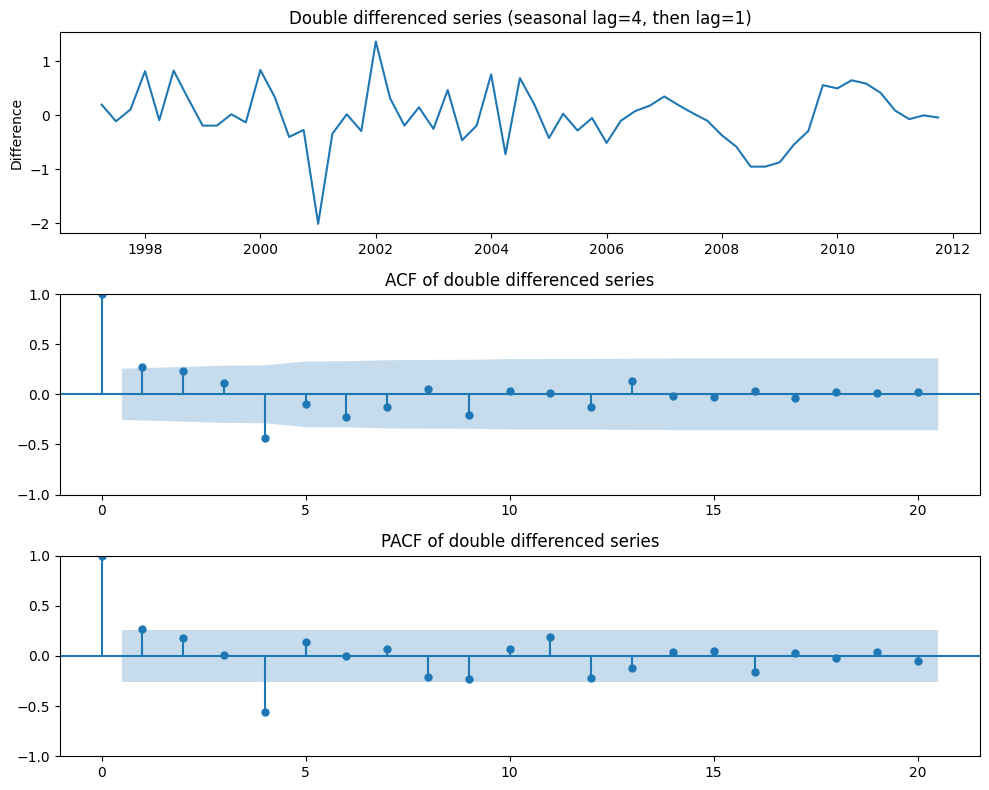

In [90]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Double differencing: first seasonal (lag=4), then regular (lag=1)
euretail_diff2 = euretail['value'].diff(4).diff().dropna()

# Align the index for correct x-axis labeling
euretail_diff2.index = euretail.index[5:]

max_lags = min(20, len(euretail_diff2) // 2 - 1)  # Ensure lags < 50% of sample size

fig, axes = plt.subplots(3, 1, figsize=(10, 8))

# Plot the double differenced series with correct time axis
axes[0].plot(euretail_diff2.index.to_timestamp(), euretail_diff2)
axes[0].set_title("Double differenced series (seasonal lag=4, then lag=1)")
axes[0].set_ylabel("Difference")

# ACF plot
plot_acf(euretail_diff2, ax=axes[1], lags=max_lags)
axes[1].set_title("ACF of double differenced series")

# PACF plot
plot_pacf(euretail_diff2, ax=axes[2], lags=max_lags, method='ywm')
axes[2].set_title("PACF of double differenced series")

plt.tight_layout()
plt.show()

## European quarterly retail trade

-   $d=1$ and $D=1$ seems necessary.
-   Significant spike at lag 1 in ACF suggests non-seasonal MA(1)
    component.
-   Significant spike at lag 4 in ACF suggests seasonal MA(1) component.
-   Initial candidate model: ARIMA(0,1,1)(0,1,1)$_4$.
-   We could also have started with ARIMA(1,1,0)(1,1,0)$_4$.

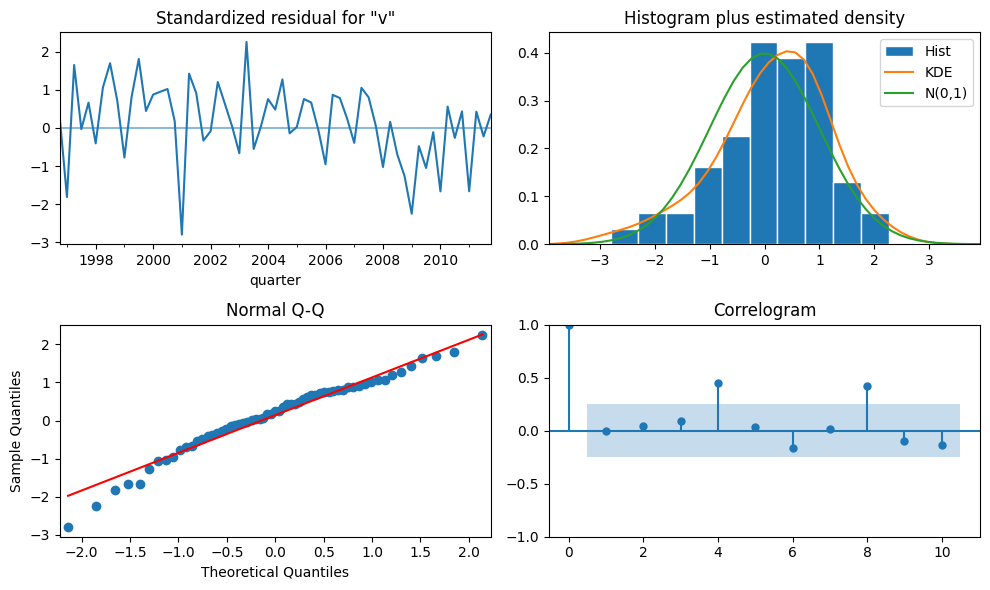

In [93]:
# Try a simpler model, e.g., no seasonal part
model = sm.tsa.SARIMAX(
    euretail['value'],
    order=(0, 1, 1),
    seasonal_order=(0, 0, 0, 0),
    enforce_stationarity=False,
    enforce_invertibility=False
)
fit = model.fit(disp=False)
fit.plot_diagnostics(figsize=(10, 6))
plt.tight_layout()
plt.show()

## European quarterly retail trade

In [95]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

# Calculate AICc for two SARIMA models
model1 = sm.tsa.SARIMAX(
    euretail['value'],
    order=(0, 1, 2),
    seasonal_order=(0, 1, 1, 4),
    enforce_stationarity=False,
    enforce_invertibility=False
).fit(disp=False)

model2 = sm.tsa.SARIMAX(
    euretail['value'],
    order=(0, 1, 3),
    seasonal_order=(0, 1, 1, 4),
    enforce_stationarity=False,
    enforce_invertibility=False
).fit(disp=False)

aicc = [model1.aicc, model2.aicc]
print("AICc values:", aicc)

AICc values: [np.float64(66.12930839017089), np.float64(61.098398797285135)]


-   The ACF and PACF of the residuals show significant spikes at lag 2, and possibly at lag 3.
-   The AICc of the ARIMA(0,1,2)(0,1,1)\(_4\) model is **66.13**.
-   The AICc of the ARIMA(0,1,3)(0,1,1)\(_4\) model is **61.10**.

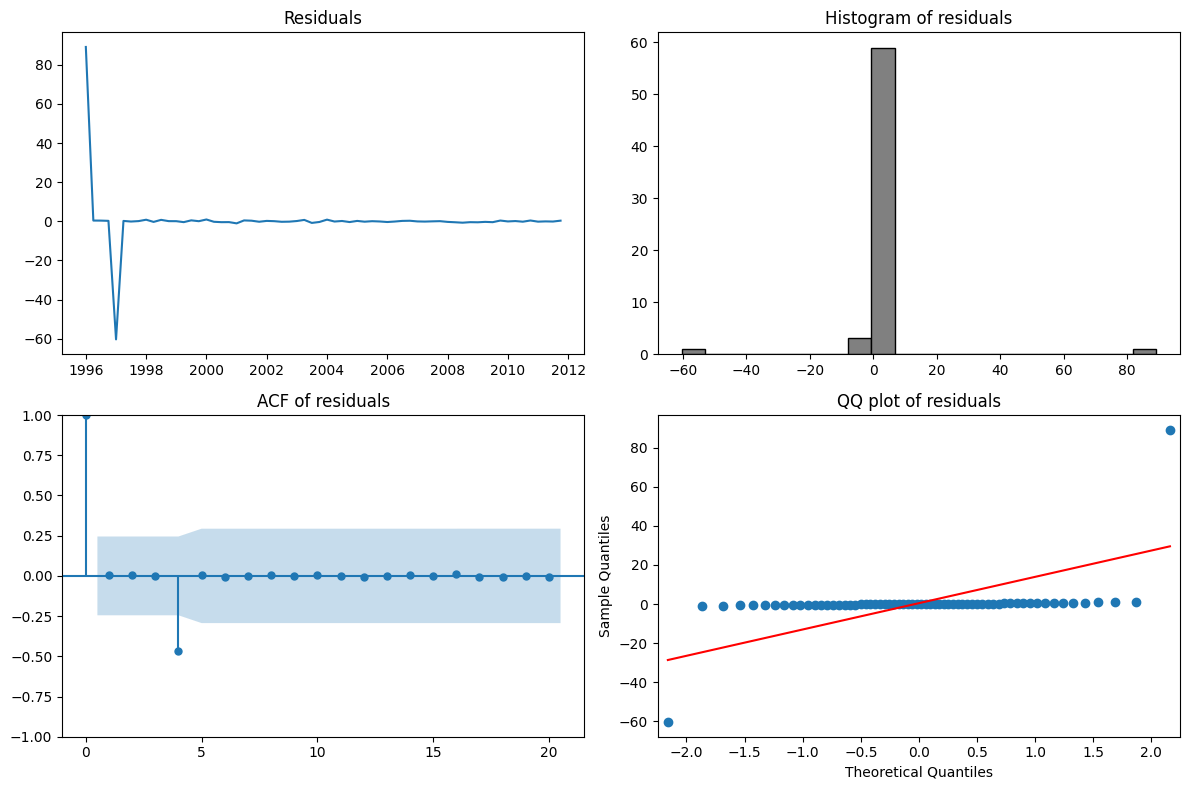

In [97]:
# Fit the ARIMA(0,1,3)(0,1,1)[4] model
fit = sm.tsa.SARIMAX(
    euretail['value'],
    order=(0, 1, 3),
    seasonal_order=(0, 1, 1, 4),
    enforce_stationarity=False,
    enforce_invertibility=False
).fit(disp=False)

# Residual diagnostics (similar to checkresiduals in R)
residuals = fit.resid

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# 1. Residuals time plot (convert PeriodIndex to Timestamp)
axes[0, 0].plot(residuals.index.to_timestamp(), residuals)
axes[0, 0].set_title("Residuals")

# 2. Histogram of residuals
axes[0, 1].hist(residuals, bins=20, color='gray', edgecolor='black')
axes[0, 1].set_title("Histogram of residuals")

# 3. ACF of residuals
plot_acf(residuals, ax=axes[1, 0], lags=20)
axes[1, 0].set_title("ACF of residuals")

# 4. QQ plot
sm.qqplot(residuals, line='s', ax=axes[1, 1])
axes[1, 1].set_title("QQ plot of residuals")

plt.tight_layout()
plt.show()

In [98]:
# Fit the ARIMA(0,1,3)(0,1,1)[4] model and print summary (Python equivalent of R's Arima summary)
fit = sm.tsa.SARIMAX(
    euretail['value'],
    order=(0, 1, 3),
    seasonal_order=(0, 1, 1, 4),
    enforce_stationarity=False,
    enforce_invertibility=False
).fit(disp=False)

print(fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               value   No. Observations:                   64
Model:             SARIMAX(0, 1, 3)x(0, 1, [1], 4)   Log Likelihood                 -24.883
Date:                             Sun, 08 Jun 2025   AIC                             59.765
Time:                                     15:59:26   BIC                             69.424
Sample:                                 03-31-1996   HQIC                            63.456
                                      - 12-31-2011                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3073      0.137      2.247      0.025       0.039       0.575
ma.L2          0.3484      

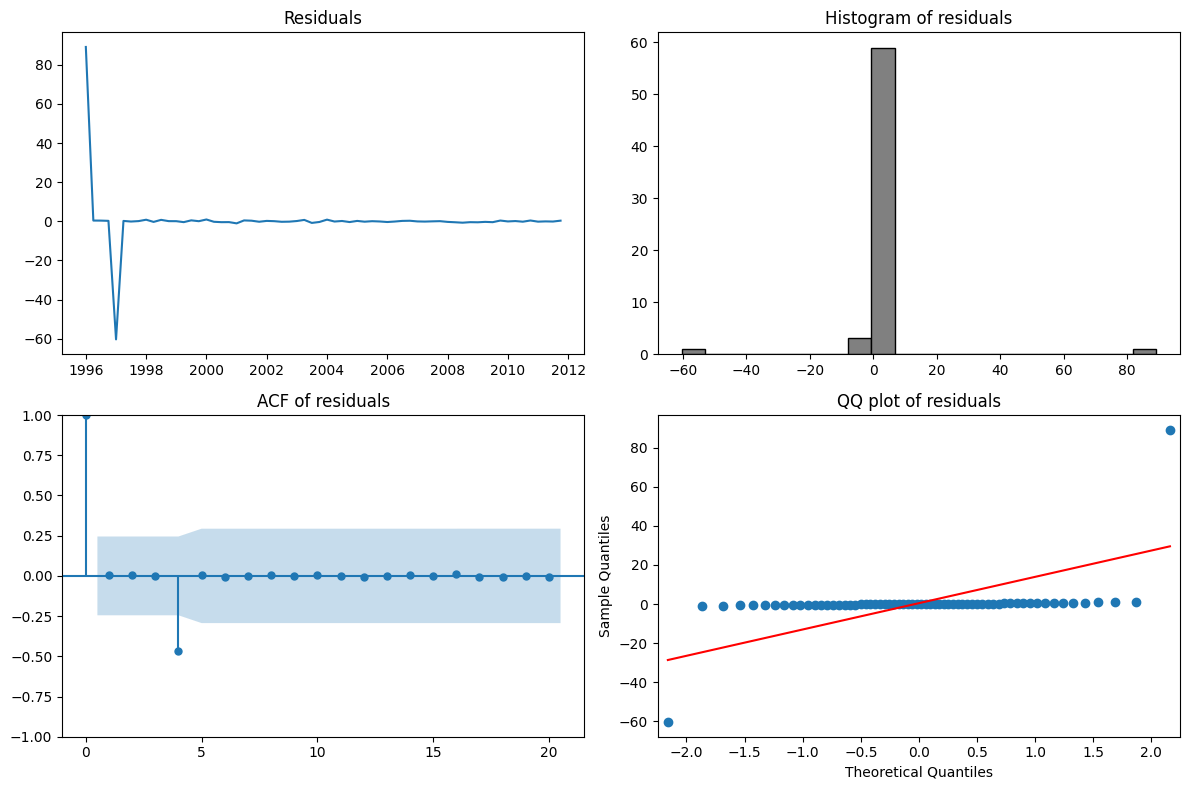

In [99]:
# Residual diagnostics for ARIMA(0,1,3)(0,1,1)[4] model (Python equivalent of R's checkresiduals)
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Residuals from the fitted model
residuals = fit.resid

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# 1. Residuals time plot (convert PeriodIndex to Timestamp if needed)
axes[0, 0].plot(residuals.index.to_timestamp(), residuals)
axes[0, 0].set_title("Residuals")

# 2. Histogram of residuals
axes[0, 1].hist(residuals, bins=20, color='gray', edgecolor='black')
axes[0, 1].set_title("Histogram of residuals")

# 3. ACF of residuals
plot_acf(residuals, ax=axes[1, 0], lags=20)
axes[1, 0].set_title("ACF of residuals")

# 4. QQ plot
sm.qqplot(residuals, line='s', ax=axes[1, 1])
axes[1, 1].set_title("QQ plot of residuals")

plt.tight_layout()
plt.show()

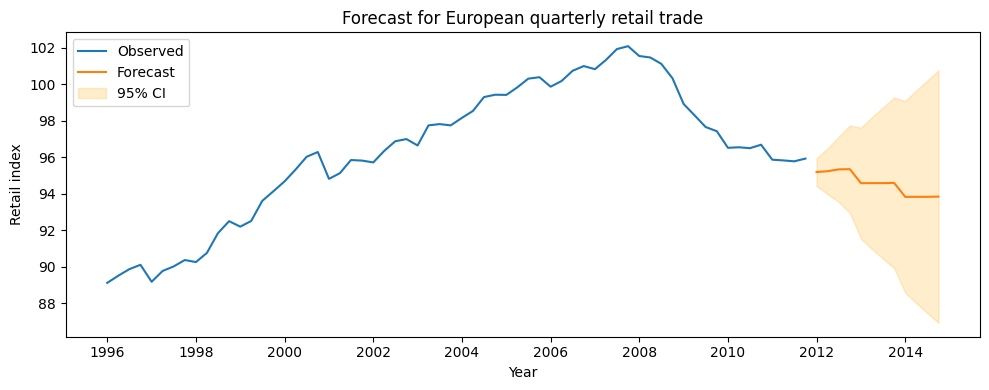

In [100]:
# Forecast the next 12 periods and plot (Python equivalent of R's autoplot(forecast(fit, h=12)))
forecast = fit.get_forecast(steps=12)
forecast_index = pd.period_range(euretail.index[-1] + 1, periods=12, freq='Q')
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

plt.figure(figsize=(10, 4))
# Plot historical data
plt.plot(euretail.index.to_timestamp(), euretail['value'], label='Observed')
# Plot forecast
plt.plot(forecast_index.to_timestamp(), forecast_mean, label='Forecast', color='tab:orange')
# Plot confidence intervals
plt.fill_between(
    forecast_index.to_timestamp(),
    forecast_ci.iloc[:, 0],
    forecast_ci.iloc[:, 1],
    color='orange', alpha=0.2, label='95% CI'
)
plt.xlabel("Year")
plt.ylabel("Retail index")
plt.title("Forecast for European quarterly retail trade")
plt.legend()
plt.tight_layout()
plt.show()

## Auto-Arima

Now, let's take a look at automatic fitting to Arima processes using https://alkaline-ml.com/pmdarima/index.html  (up to Python 3.8).

In [3]:
# Auto ARIMA (Python equivalent of R's auto.arima)
import pmdarima as pm

auto_model = pm.auto_arima(
    euretail['value'],
    seasonal=True,
    m=4,  # quarterly seasonality
    stepwise=True,
    suppress_warnings=True,
    trace=True
)
print(auto_model.summary())

ModuleNotFoundError: No module named 'pmdarima'

In [4]:
# More thorough auto_arima search (stepwise=False, approximation=False as in R)
import pmdarima as pm

auto_model = pm.auto_arima(
    euretail['value'],
    seasonal=True,
    m=4,  # quarterly seasonality
    stepwise=False,         # exhaustive search
    approximation=False,    # use exact likelihood
    suppress_warnings=True,
    trace=True
)
print(auto_model.summary())

ModuleNotFoundError: No module named 'pmdarima'

## Extra credits - team assignment

Apply ARIMA modeling for this time series (hsales) /do it after 2 lectures with presentations about ARIMA models/.